# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [18]:
import os
root_path = os.getcwd().split('Ignorar_Backup',)[0]

In [19]:
import sys
sys.path.append(root_path + '02_Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



* Check Libraries below are actually needed

In [20]:
import pandas as pd
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime

Se puede agregar a la librería


In [21]:
def adjust_column_widths(table, ax):
    for i, col in enumerate(table.get_celld().values()):
        max_width = max([len(str(cell.get_text().get_text())) for cell in table.get_celld().values() if cell.get_text().get_text() != ''])
        table.auto_set_column_width([i])
        for key, cell in table.get_celld().items():
            if key[1] == i:
                cell.set_width(max_width * 0.1)

0. Extra information

1. Procesing and solving the model

In [23]:
Mod = DPP.process_file3(root_path + '04_Modelo/MPTBolsillo.txt')
Mod = DLM.SolveModel(Mod, root_path + "04_Modelo/Cal_MPTBolsillo.txt", True)

-> Stability conditions met

Steady state
            User supplied  Numerical
DY_eq                5.30       5.30
DYs_eq               2.10       2.10
Ds                   0.00       0.00
y                    0.00       0.00
ys                   0.00       0.00
Dpae                 2.00       2.00
Dp                   2.00       2.00
Dp(-2)               2.00       2.00
Dp(-1)               2.00       2.00
D4p                  2.00       2.00
Dpsae                2.00       2.00
Dpsae(-2)            2.00       2.00
Dpsae(-1)            2.00       2.00
ED4p                 2.00       2.00
Dpm                  2.00       2.00
Dpm(-2)              2.00       2.00
Dpm(-1)              2.00       2.00
Meta                 2.00       2.00
i                    3.75       3.75
ieq                  3.75       3.75
zmn                  1.75       1.75
zme                  0.00       0.00
Ds(-2)               0.00       0.00
Ds(-1)               0.00       0.00
ED4s                 0.00       0

3. Load data

In [26]:
var = DLM.sympy_to_list(Mod['Desc.']['Declared Endogenous'])
varexo = DLM.sympy_to_list(Mod['Desc.']['Shocks'])

In [27]:
Describ, DBobs = HTS.ReadDB_excel('DataTarea.xlsx',sheet='VarObs')
DBobs.tail(10)

Dpsae    D4psae      Dpae        Dp       D4p  Meta        Dpm  \
2022-09-30  2.632593  2.499839  7.781002  4.798446  3.112064   2.0  13.503288   
2022-12-31  2.814612  2.883250  0.640128  1.879315  2.948742   2.0  -2.939037   
2023-03-31  3.077352  2.900476  4.084779  3.506476  3.401720   2.0   0.361840   
2023-06-30  2.679682  2.800914  5.555727  3.901750  3.516079   2.0  -0.915118   
2023-09-30  1.882223  2.612497  3.106990  2.406473  2.920279   2.0   0.345776   
2023-12-31  2.481670  2.529324  3.227474  2.801772  3.152462   2.0   5.767338   
2024-03-31  3.008166  2.512115  2.248017  2.680545  2.946067   2.0   3.095878   
2024-06-30  4.082850  2.860554  7.219557  5.422641  3.320742   2.0   3.216034   
2024-09-30  4.124964  3.422010  4.970464  4.489321  3.842143   2.0   0.090295   
2024-12-31  2.669623  3.469396  5.086311  3.708887  4.070463   2.0   3.244339   

                ED4p         i       imn  ...      ED4s        DTI        DY  \
2022-09-30  2.595139  4.250000  4.372233  ...  0.549703  -7.308628  5.895259   
2022-12-31  2.663889  4.083333  4.173267  ...  2.200586  -4.431448  6.975104   
2023-03-31  2.637500  4.000000  4.102700  ...  1.783257  -3.556389  0.902650   
2023-06-30  2.780556  4.000000  4.002600  ...  2.124577  -9.908233 -3.199566   
2023-09-30  2.809722  3.666667  3.768467  ...  2.540294  11.847543  2.983751   
2023-12-31  2.675000  3.500000  3.655433  ...  4.041725  -4.474867  3.267202   
2024-03-31  2.559722  3.250000  3.375700  ...  5.005247 -15.162748  4.836882   
2024-06-30  2.850000  3.250000  3.448333  ...  4.501502  -2.335034  2.325826   
2024-09-30  3.172222  3.333333  3.579600  ...  5.491638 -17.617505  2.168388   
2024-12-31  3.353472  3.583333  3.595333  ...  5.710557  -2.428329  8.730329   

                 EDy         g         t       Dps       Dpms      iext  \
2022-09-30 -1.533333  1.062746  0.445808  2.135616  -2.931331  0.261366   
2022-12-31 -0.400000  1.403380  1.037830  1.741231  -0.085781  0.241392   
2023-03-31 -0.200000  0.876576  0.655686  3.480585   1.082408  0.235957   
2023-06-30 -1.133333  0.832734  0.175194  2.239277   4.219383  0.228127   
2023-09-30 -1.266667  1.199703 -0.831637  1.393189  -5.678142  0.234345   
2023-12-31 -1.000000  0.795906 -0.296215  0.180207 -17.408762  0.236630   
2024-03-31 -1.066667 -1.336614 -0.552873  1.600935 -13.605551  0.260365   
2024-06-30 -1.600000 -0.283251 -1.547109  2.674105  -2.809793  0.279418   
2024-09-30 -2.200000 -0.873333 -0.557406  2.194877  -6.507012  0.314323   
2024-12-31 -2.266667 -0.314853 -0.759744  0.427300  -8.489430  0.410547   

               DYs  
2022-09-30  3.1213  
2022-12-31  3.1821  
2023-03-31 -1.1754  
2023-06-30  5.4763  
2023-09-30  4.9246  
2023-12-31  2.2209  
2024-03-31  3.2507  
2024-06-30  2.2507  
2024-09-30  1.2507  
2024-12-31  0.5507  

[10 rows x 23 columns]

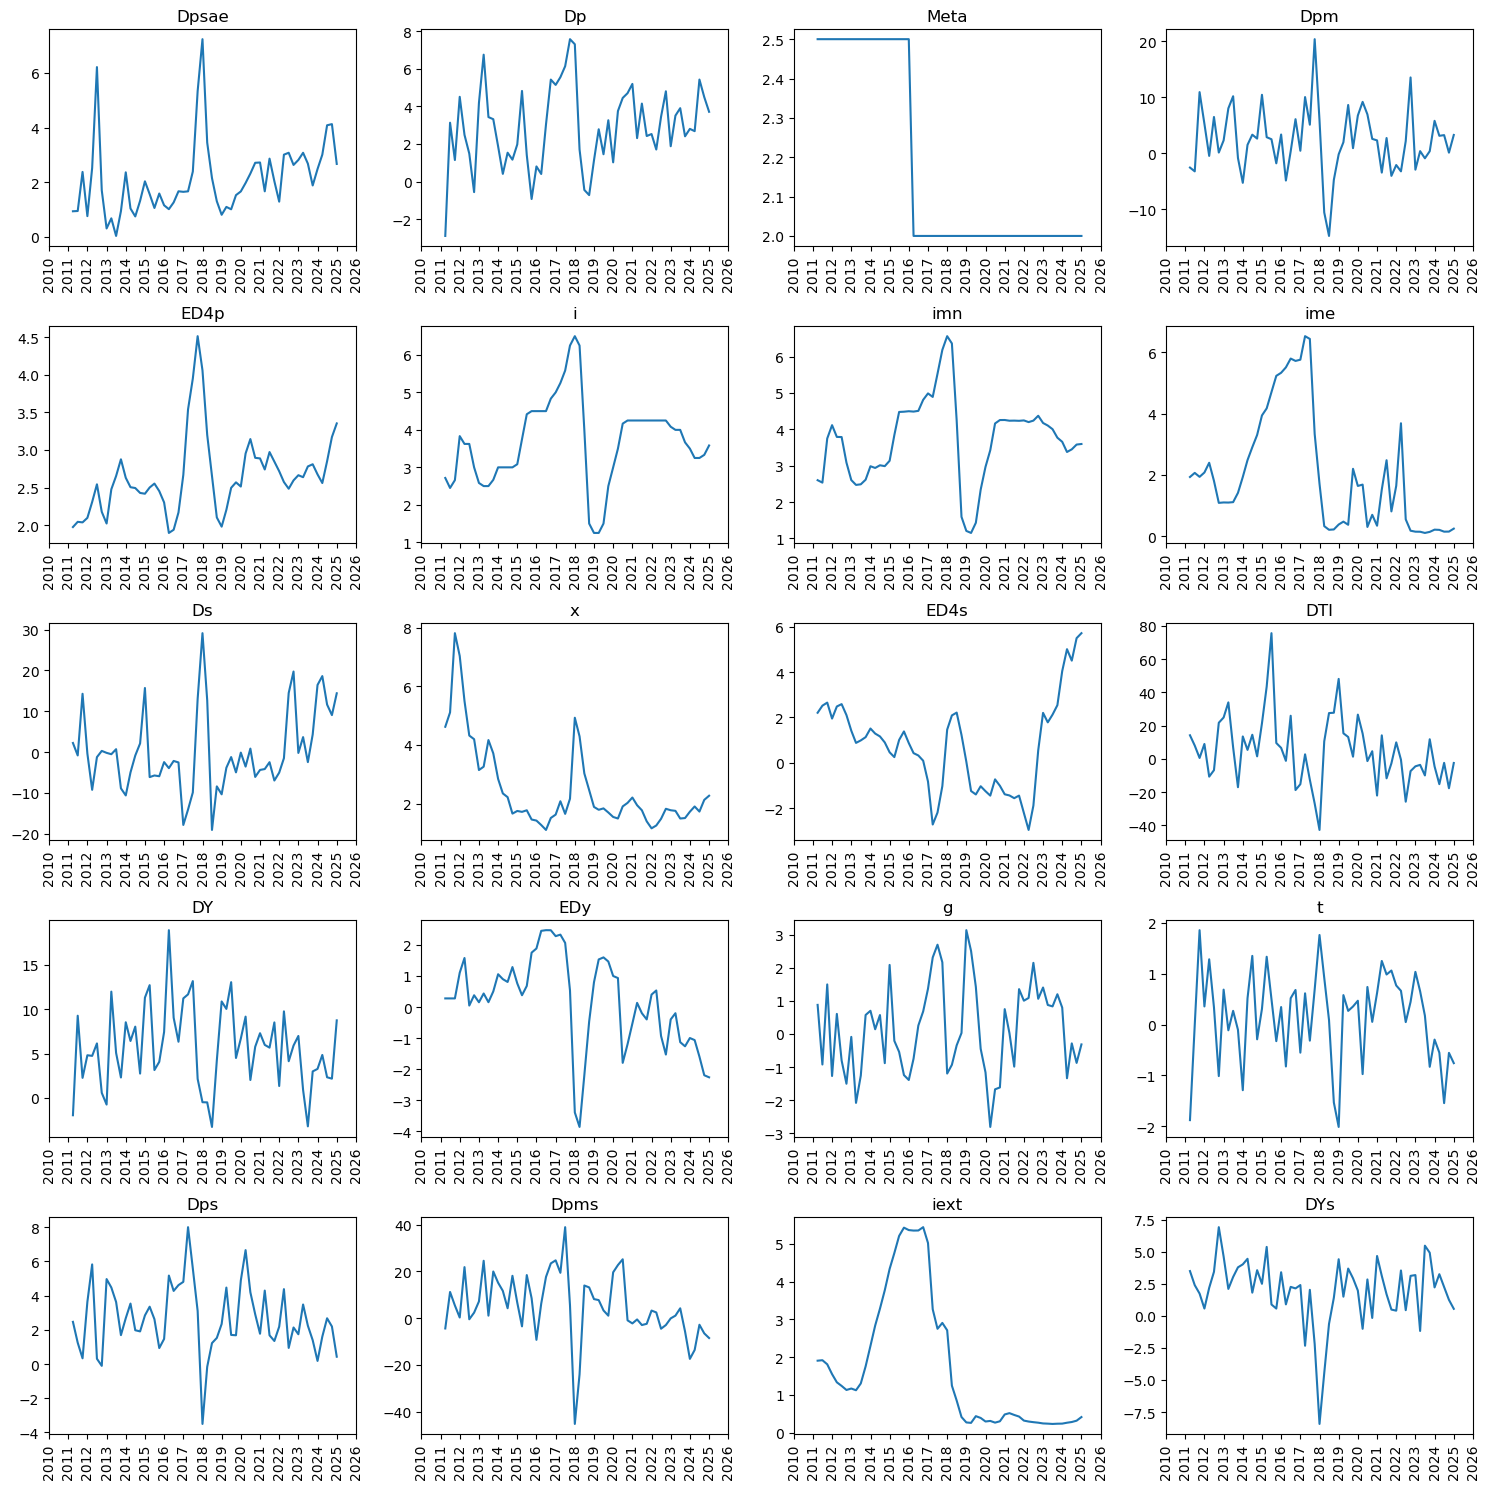

In [28]:
obsnames = DLM.sympy_to_list(Mod['StateSpaceForm']['obs_names'])
num_cols = len(obsnames)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(obsnames):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DBobs.index, DBobs[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [29]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})
DF_s.tail(10)

DY_eq    DYs_eq         Ds         y        ys      Dpae  \
2022-09-30  4.609838  1.941139  19.716183  1.493783 -2.186877  7.475086   
2022-12-31  4.292640  1.915132  -0.216636  2.164399 -1.870135  0.723442   
2023-03-31  3.977530  1.912072   3.663468  1.395679 -2.642003  4.036802   
2023-06-30  3.796042  1.912644  -2.462627 -0.353223 -1.751089  5.412027   
2023-09-30  3.720078  1.821373   4.315556 -0.537305 -0.975282  3.054361   
2023-12-31  3.701586  1.697721  16.429421 -0.645901 -0.844487  3.197366   
2024-03-31  3.741512  1.572541  18.601325 -0.372058 -0.424948  2.275660   
2024-06-30  3.837340  1.481059  11.631337 -0.749937 -0.232537  7.078403   
2024-09-30  3.975434  1.436834   9.053224 -1.201698 -0.279071  4.939607   
2024-12-31  4.061683  1.428075  14.390420 -0.034537 -0.498415  4.993248   

                  Dp    Dp(-2)    Dp(-1)       D4p  ...    D4s(+1)         x  \
2022-09-30  4.798446  1.704613  3.443371  3.118446  ...   6.954043  1.825818   
2022-12-31  1.879315  3.443371  4.798446  2.956436  ...   7.447818  1.776215   
2023-03-31  3.506476  4.798446  1.879315  3.406902  ...   4.762123  1.756040   
2023-06-30  3.901750  1.879315  3.506476  3.521497  ...  -0.593624  1.494921   
2023-09-30  2.406473  3.506476  3.901750  2.923504  ...   0.744383  1.510159   
2023-12-31  2.801772  3.901750  2.406473  3.154118  ...   4.089270  1.726194   
2024-03-31  2.680545  2.406473  2.801772  2.947635  ...   9.533080  1.904598   
2024-06-30  5.422641  2.801772  2.680545  3.327858  ...  11.216721  1.731182   
2024-09-30  4.489321  2.680545  5.422641  3.848570  ...   9.583825  2.129473   
2024-12-31  3.708887  5.422641  4.489321  4.075349  ...   8.370837  2.270804   

                   DQ     DQ_eq      D4ps  D4ps(+3)  D4ps(+2)  D4ps(+1)  \
2022-09-30  17.053353  2.565400  2.409987  1.839301  1.630761  2.295100   
2022-12-31  -0.354720  2.028890  2.298987  1.734414  1.821073  1.624008   
2023-03-31   3.637578  2.324456  2.074783  2.215009  2.215750  2.321490   
2023-06-30  -4.125099  1.139620  2.399177  1.910568  2.325726  2.316054   
2023-09-30   3.302272  1.536901  2.213571  1.679479  1.780205  2.202143   
2023-12-31  13.807855  3.791168  1.823315  1.265745  1.171327  1.307469   
2024-03-31  17.521715  6.313536  1.353402  1.695702  1.302945  1.217756   
2024-06-30   8.882800  6.785505  1.462109  2.010292  1.979153  1.586919   
2024-09-30   6.758780  6.780595  1.662531  1.838380  2.084314  2.059953   
2024-12-31  11.108833  7.575748  1.724304  1.262829  1.399839  1.670102   

                  Rs     Rs_eq  
2022-09-30 -1.501090 -0.732342  
2022-12-31 -1.516590 -0.758578  
2023-03-31 -1.557144 -0.538302  
2023-06-30 -1.587181 -0.370836  
2023-09-30 -1.561749 -0.402181  
2023-12-31 -1.433717 -0.443156  
2024-03-31 -1.474856 -0.528716  
2024-06-30 -1.492735 -0.604802  
2024-09-30 -1.398074 -0.616680  
2024-12-31 -1.161649 -0.536551  

[10 rows x 74 columns]

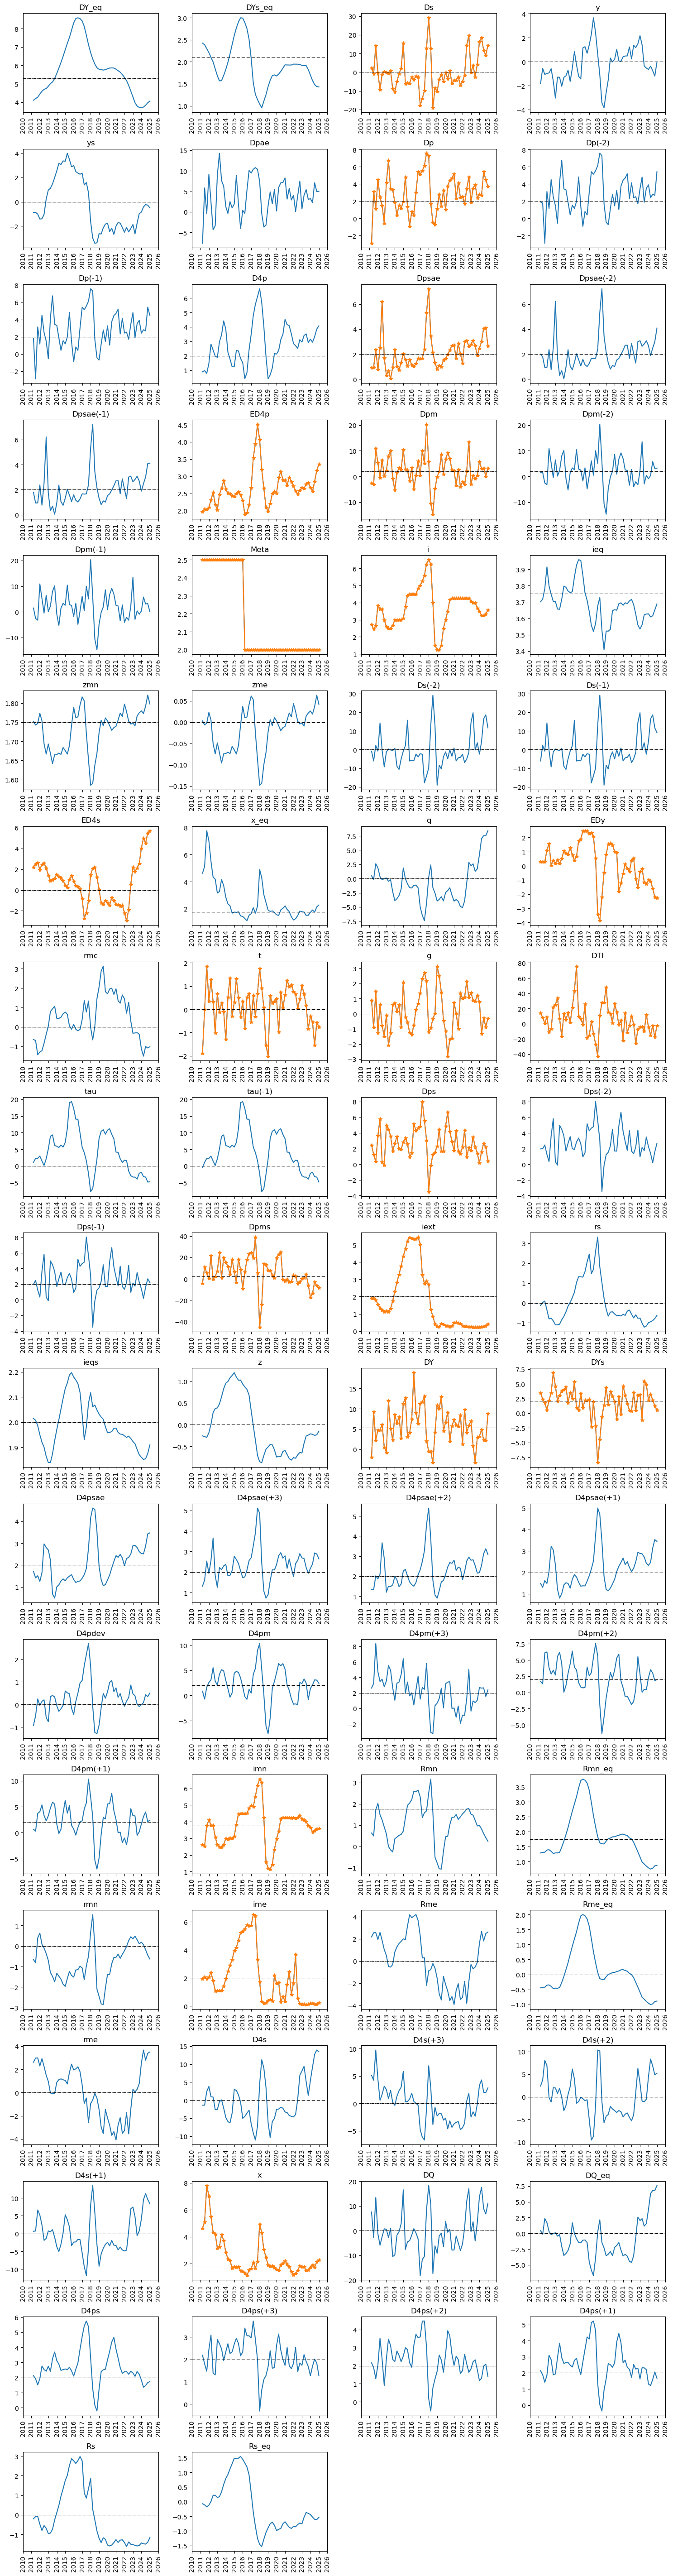

In [30]:
columns  = DF_s.columns
SS       = Mod['Solution']['Y0'].reshape(-1,1)
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DF_s.index, DF_s[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    observable = False
    for obs in obsnames:
        if col == obs:
            observable = True
    if observable:
        axs[row, col_idx].plot(DF_s.index, DBobs[col], linestyle='-',marker='*')
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

    axs[row, col_idx].axhline(y=SS[idx], color='black', linestyle='-.', linewidth=0.75)

    axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [32]:
Data = DF_s
Data.tail(10)

DY_eq    DYs_eq         Ds         y        ys      Dpae  \
2022-09-30  4.609838  1.941139  19.716183  1.493783 -2.186877  7.475086   
2022-12-31  4.292640  1.915132  -0.216636  2.164399 -1.870135  0.723442   
2023-03-31  3.977530  1.912072   3.663468  1.395679 -2.642003  4.036802   
2023-06-30  3.796042  1.912644  -2.462627 -0.353223 -1.751089  5.412027   
2023-09-30  3.720078  1.821373   4.315556 -0.537305 -0.975282  3.054361   
2023-12-31  3.701586  1.697721  16.429421 -0.645901 -0.844487  3.197366   
2024-03-31  3.741512  1.572541  18.601325 -0.372058 -0.424948  2.275660   
2024-06-30  3.837340  1.481059  11.631337 -0.749937 -0.232537  7.078403   
2024-09-30  3.975434  1.436834   9.053224 -1.201698 -0.279071  4.939607   
2024-12-31  4.061683  1.428075  14.390420 -0.034537 -0.498415  4.993248   

                  Dp    Dp(-2)    Dp(-1)       D4p  ...    D4s(+1)         x  \
2022-09-30  4.798446  1.704613  3.443371  3.118446  ...   6.954043  1.825818   
2022-12-31  1.879315  3.443371  4.798446  2.956436  ...   7.447818  1.776215   
2023-03-31  3.506476  4.798446  1.879315  3.406902  ...   4.762123  1.756040   
2023-06-30  3.901750  1.879315  3.506476  3.521497  ...  -0.593624  1.494921   
2023-09-30  2.406473  3.506476  3.901750  2.923504  ...   0.744383  1.510159   
2023-12-31  2.801772  3.901750  2.406473  3.154118  ...   4.089270  1.726194   
2024-03-31  2.680545  2.406473  2.801772  2.947635  ...   9.533080  1.904598   
2024-06-30  5.422641  2.801772  2.680545  3.327858  ...  11.216721  1.731182   
2024-09-30  4.489321  2.680545  5.422641  3.848570  ...   9.583825  2.129473   
2024-12-31  3.708887  5.422641  4.489321  4.075349  ...   8.370837  2.270804   

                   DQ     DQ_eq      D4ps  D4ps(+3)  D4ps(+2)  D4ps(+1)  \
2022-09-30  17.053353  2.565400  2.409987  1.839301  1.630761  2.295100   
2022-12-31  -0.354720  2.028890  2.298987  1.734414  1.821073  1.624008   
2023-03-31   3.637578  2.324456  2.074783  2.215009  2.215750  2.321490   
2023-06-30  -4.125099  1.139620  2.399177  1.910568  2.325726  2.316054   
2023-09-30   3.302272  1.536901  2.213571  1.679479  1.780205  2.202143   
2023-12-31  13.807855  3.791168  1.823315  1.265745  1.171327  1.307469   
2024-03-31  17.521715  6.313536  1.353402  1.695702  1.302945  1.217756   
2024-06-30   8.882800  6.785505  1.462109  2.010292  1.979153  1.586919   
2024-09-30   6.758780  6.780595  1.662531  1.838380  2.084314  2.059953   
2024-12-31  11.108833  7.575748  1.724304  1.262829  1.399839  1.670102   

                  Rs     Rs_eq  
2022-09-30 -1.501090 -0.732342  
2022-12-31 -1.516590 -0.758578  
2023-03-31 -1.557144 -0.538302  
2023-06-30 -1.587181 -0.370836  
2023-09-30 -1.561749 -0.402181  
2023-12-31 -1.433717 -0.443156  
2024-03-31 -1.474856 -0.528716  
2024-06-30 -1.492735 -0.604802  
2024-09-30 -1.398074 -0.616680  
2024-12-31 -1.161649 -0.536551  

[10 rows x 74 columns]

# Forecast

1. Unconditional

In [33]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1')

In [34]:
FDB.to_excel('Libre.xlsx')

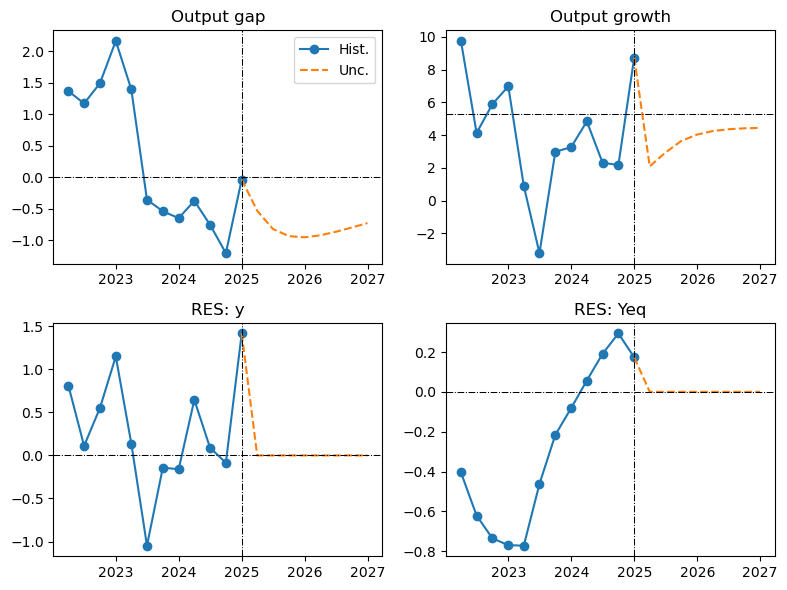

In [13]:
DBdict = {'Unc.': FDB}
lista = ['y','DY','res_y','res_DY_eq']
listanames = ['Output gap','Output growth','RES: y','RES: Yeq']
listaSS = [0,5.3,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [14]:
FDB_report_endog = FDB.loc[FDB.index[-(FH+4):]][var] \
                      .round(2) 

FDB_report_exog = FDB.loc[FDB.index[-(FH+4):]][varexo] \
                      .round(2) 

FDB_report_endog.index = FDB_report_endog.index.to_period('Q').strftime('%Y-Q%q')
FDB_report_exog.index = FDB_report_exog.index.to_period('Q').strftime('%Y-Q%q')

FDB_report_endog_pdf = FDB_report_endog.T
FDB_report_exog_pdf = FDB_report_exog.T

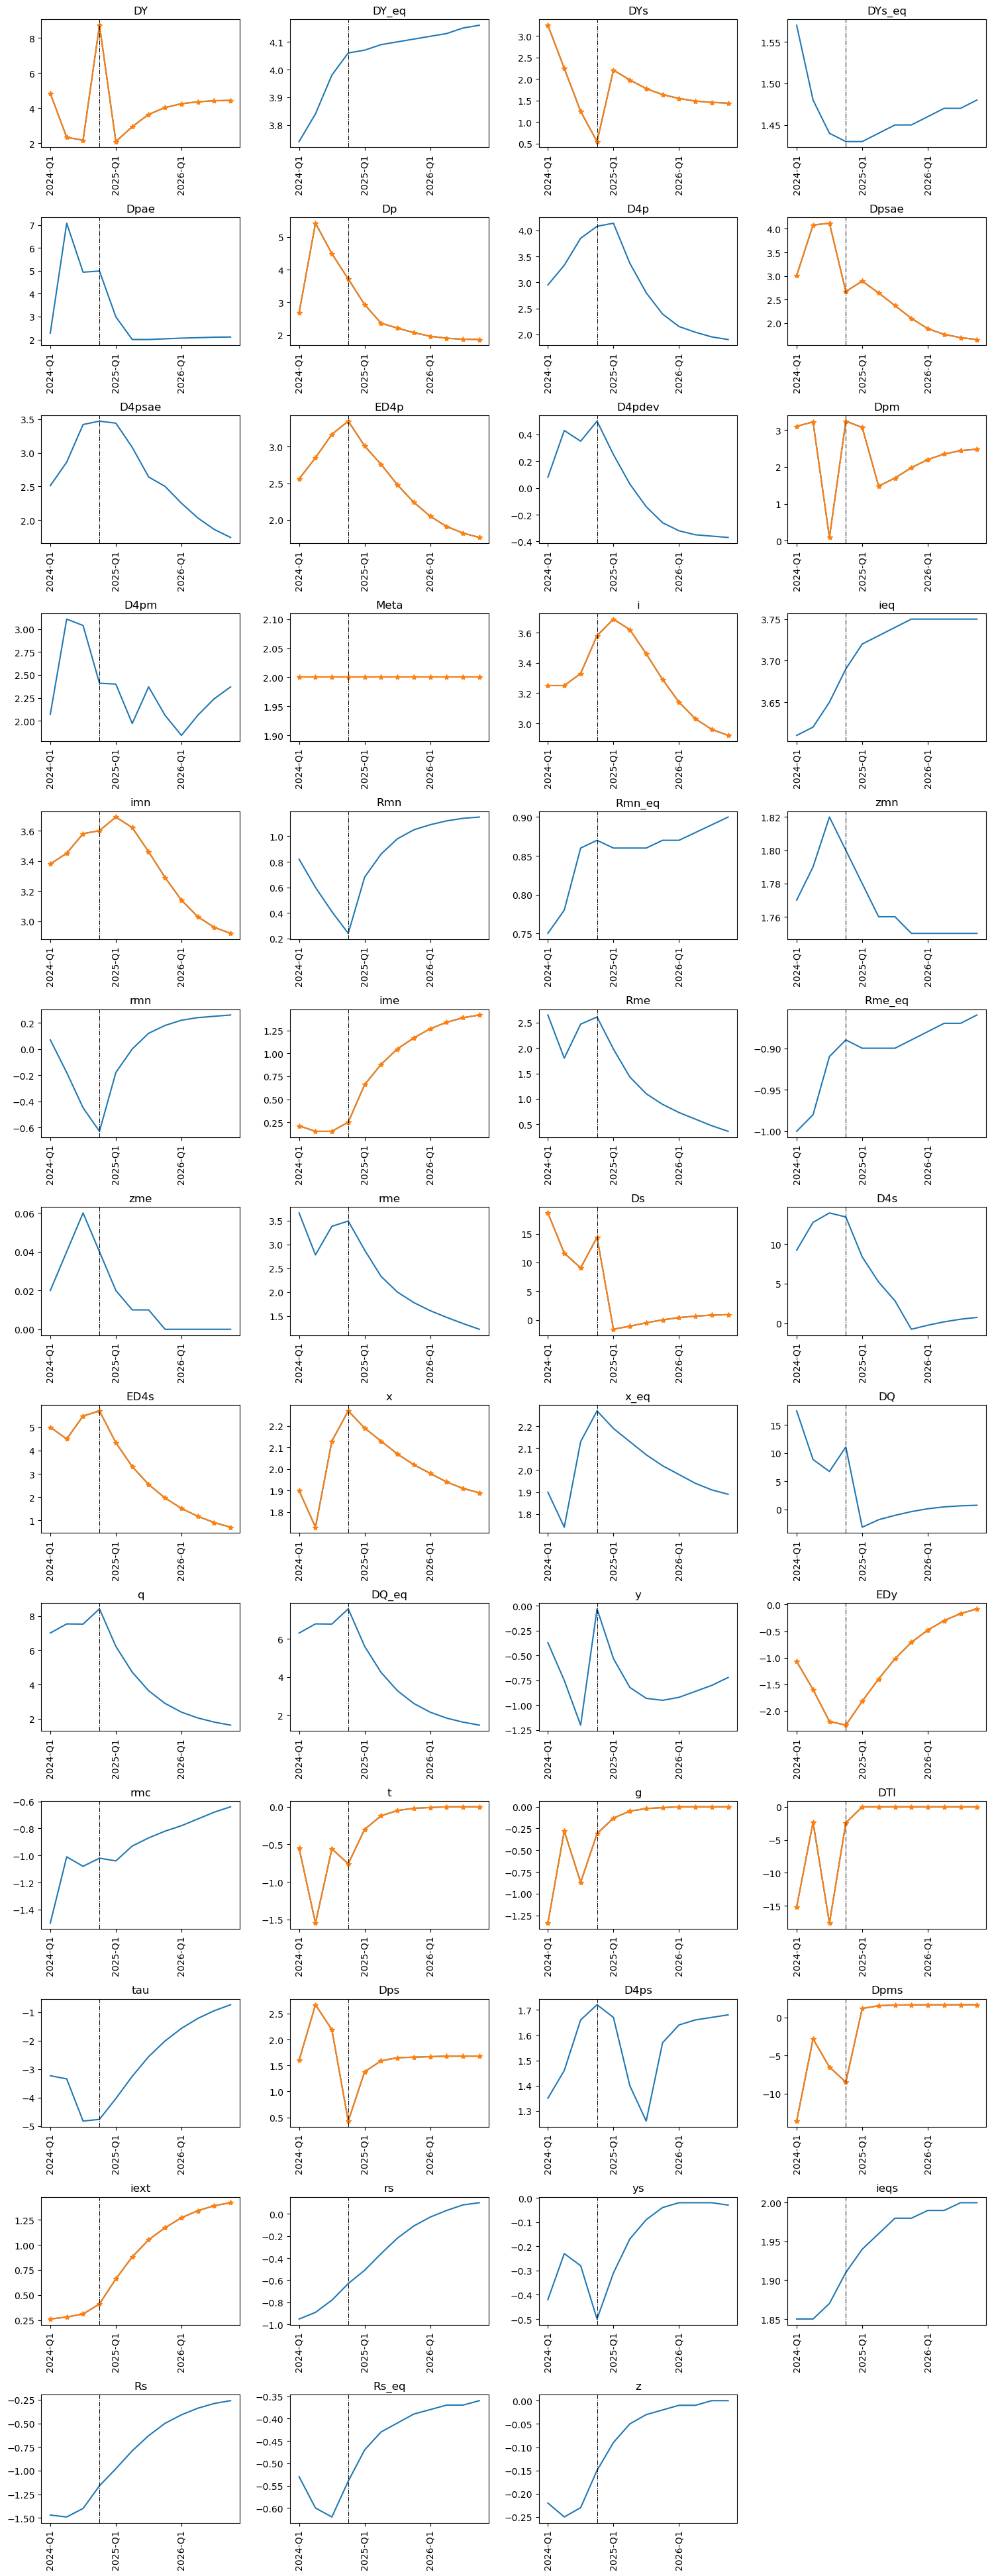

In [15]:
columns = FDB_report_endog.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(FDB_report_endog.index, FDB_report_endog[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    observable = False
    for obs in obsnames:
        if col == obs:
            observable = True
    if observable:
        axs[row, col_idx].plot(FDB_report_endog.index, FDB_report_endog[col], linestyle='-',marker='*')
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    xticks = axs[row, col_idx].get_xticks()
    axs[row, col_idx].set_xticks(xticks[::4])

    if len(xticks) > 3:
        axs[row, col_idx].axvline(x=xticks[3], color='black', linestyle='-.', linewidth=0.75)


    #axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    #axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [16]:
pdf_file = "FDB_report.pdf"
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with PdfPages(pdf_file) as pdf:
    # First page for FDB_report_endog
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    table = ax.table(cellText=FDB_report_endog_pdf.values,
                     colLabels=FDB_report_endog_pdf.columns,
                     rowLabels=FDB_report_endog_pdf.index,
                     cellLoc='center',
                     loc='center')

    fig.text(0.01, 0.99, f'Fecha de reporte: {current_datetime}', fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    adjust_column_widths(table, ax)

    fig.tight_layout(pad=3.0)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # Second page for FDB_report_exog
    fig_exog, ax_exog = plt.subplots(figsize=(8.5, 11))
    ax_exog.xaxis.set_visible(False)
    ax_exog.yaxis.set_visible(False)
    ax_exog.set_frame_on(False)

    table_exog = ax_exog.table(cellText=FDB_report_exog.values,
                               colLabels=FDB_report_exog.columns,
                               rowLabels=FDB_report_exog.index,
                               cellLoc='center',
                               loc='center')

    fig_exog.text(0.01, 0.99, f'Fecha de reporte: {current_datetime}', fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

    table_exog.auto_set_font_size(False)
    table_exog.set_fontsize(10)
    table_exog.scale(1.2, 1.2)

    adjust_column_widths(table_exog, ax_exog)

    fig_exog.tight_layout(pad=3.0)
    pdf.savefig(fig_exog, bbox_inches='tight')
    plt.close(fig_exog)

print(f"'{pdf_file}' created successfully.")

E:\Users\2274\AppData\Local\Temp\ipykernel_37464\3850568525.py:49: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig_exog.tight_layout(pad=3.0)


'FDB_report.pdf' created successfully.


2. Not anticipated conditional forecast

In [17]:
UCond = HTS.ReadForeCond('DataTarea_Exogenas.xlsx','2025Q1', FH)

In [18]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(UCond['UShock'])
print('Unanticipated Hardtunning')
print(UCond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(UCond['Uvar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31      NaN     NaN
2025-06-30      NaN     NaN
2025-09-30      NaN     NaN
2025-12-31      NaN     NaN
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
            Meta       DYs      Dpae         t         g  DTI       Dps  \
2025-03-31   2.0  2.207918  2.987568 -0.298048 -0.126319  0.0  1.384126   
2025-06-30   2.0  1.975786  1.998147 -0.116924 -0.050679  0.0  1.593054   
2025-09-30   2.0  1.781167  2.000552 -0.045869 -0.020332  0.0  1.646833   
2025-12-31   2.0  1.640418  2.034655 -0.017995 -0.008157  0.0  1.664769   
2026-03-31   2.0  1.546577  2.058835 -0.007059 -0.003273  0.0  1.672243   
2026-06-30   2.0  1.488975  2.084970 -0.002769 -0.001313  0.0  1.675619   
2026-09-30   2.0  1.457705  2.103786 -0.001086 -0.000527  0.0  1.677104   
2026-12-31   2.0  1.444628  2.112211 -0.000426 -0.000211  0.0  1.6777

In [19]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',UCond)

In [20]:
UFDB_report_endog = UFDB.loc[UFDB.index[-(FH+4):]][var] \
                      .round(2) 

UFDB_report_exog = UFDB.loc[UFDB.index[-(FH+4):]][varexo] \
                      .round(2)

UFDB_report_endog.index = UFDB_report_endog.index.to_period('Q').strftime('%Y-Q%q')
UFDB_report_exog.index = UFDB_report_exog.index.to_period('Q').strftime('%Y-Q%q')

UFDB_report_endog_pdf = UFDB_report_endog.T
UFDB_report_exog_pdf = UFDB_report_exog.T

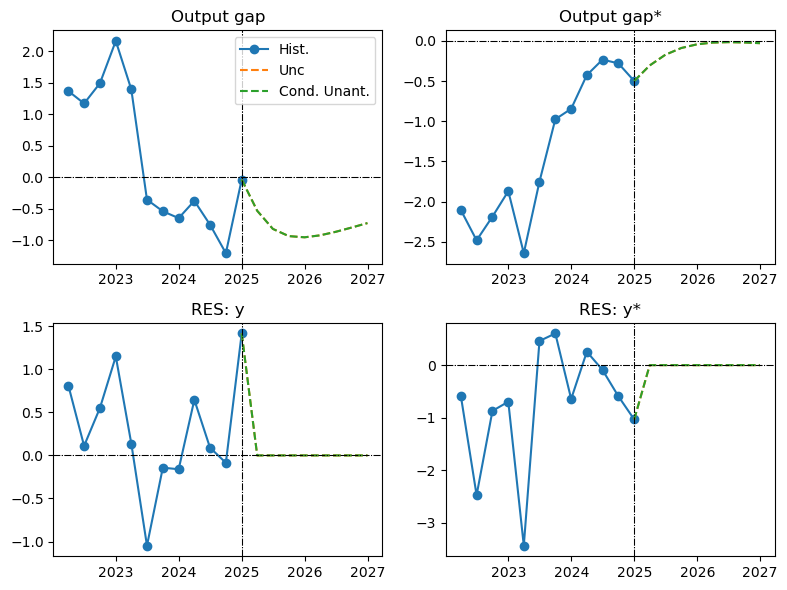

In [21]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

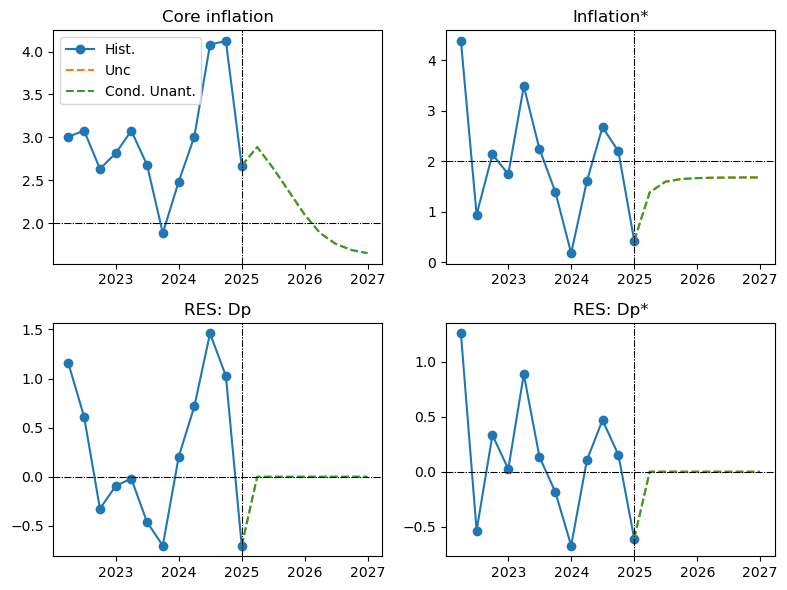

In [22]:
lista = ['Dpsae','Dps','res_Dpsae','res_Dps']
listanames = ['Core inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [2,2,0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

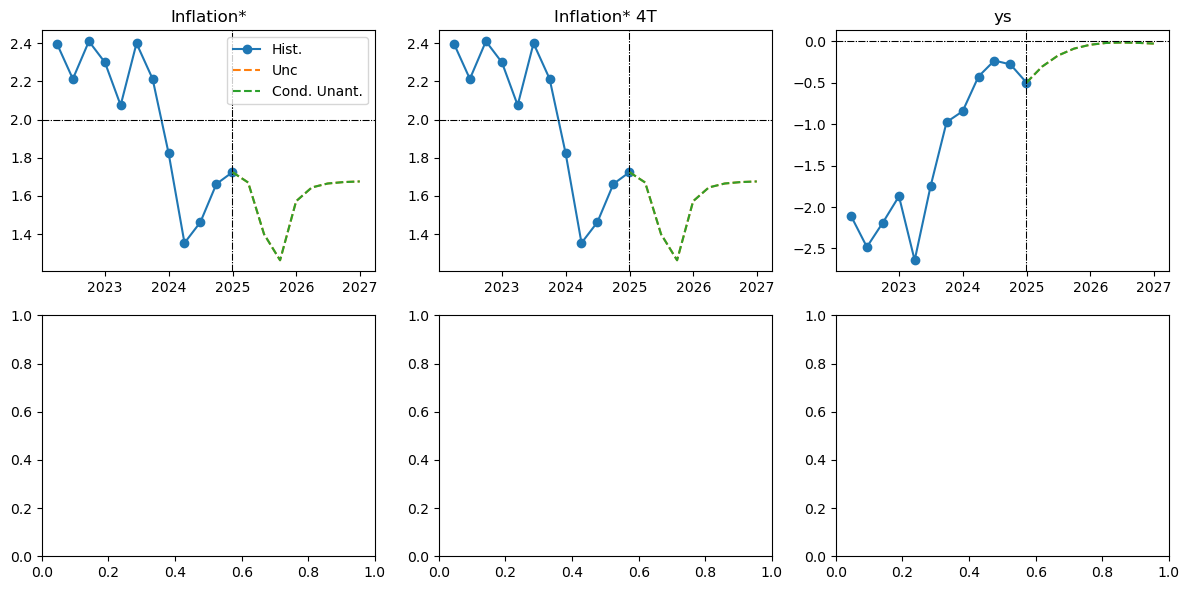

In [23]:
# Dps = bsp*Dps(-1) + (1 - bsp)*D4ps(+4) + bsy*ys(-1) + res_Dps
lista   = ['D4ps','D4ps','ys']
listaSS = [2,2,0]
listanames = ['Inflation*','Inflation* 4T','ys']

fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,2,3)

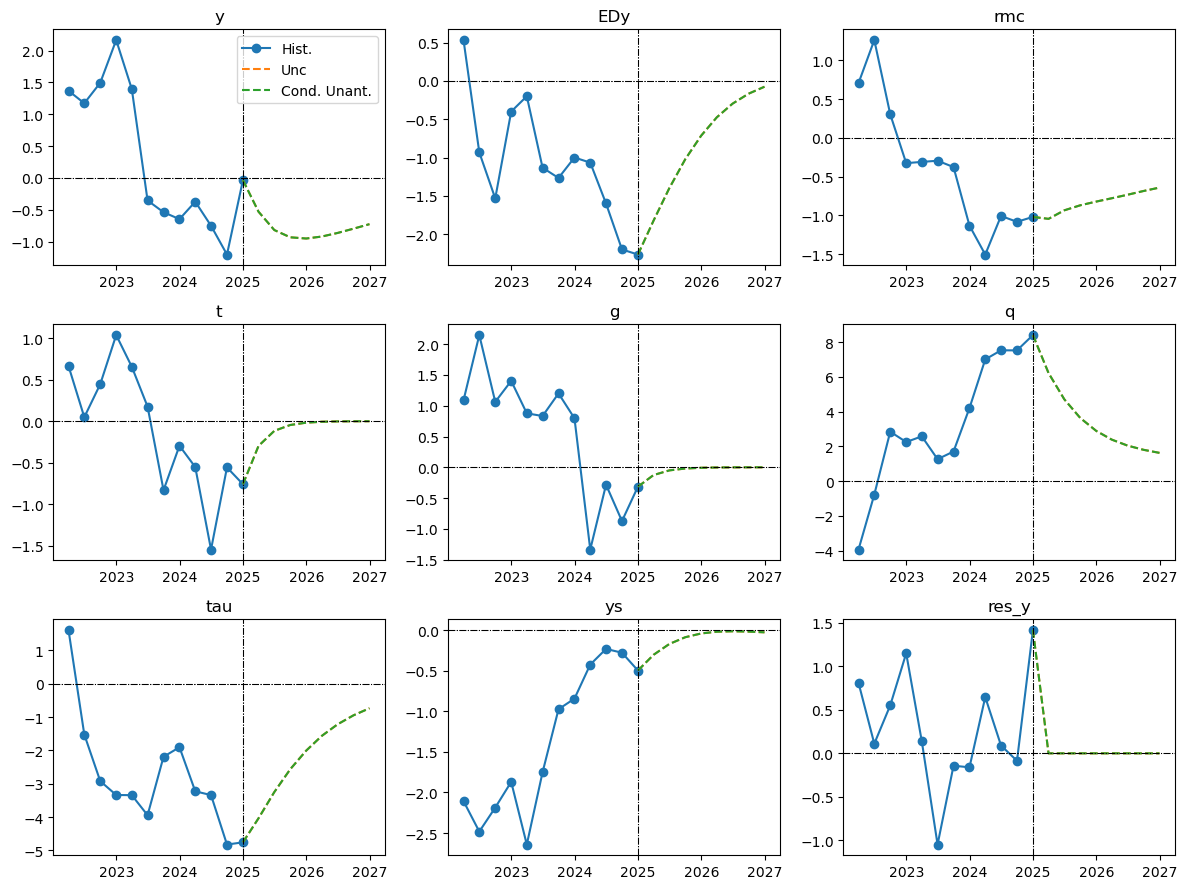

In [24]:
#y = ay*y(-1) + aEy*(y(-1) + EDy) + armc*rmc(-1) - at*t + ag*g + aq*q + atau*tau+ ays*ys + m_res_y*res_y
lista   = ['y','EDy','rmc','t','g','q','tau','ys','res_y']
listaSS = [0,0,0,0,0,0,0,0,0]
listanames = lista

fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,3,3)

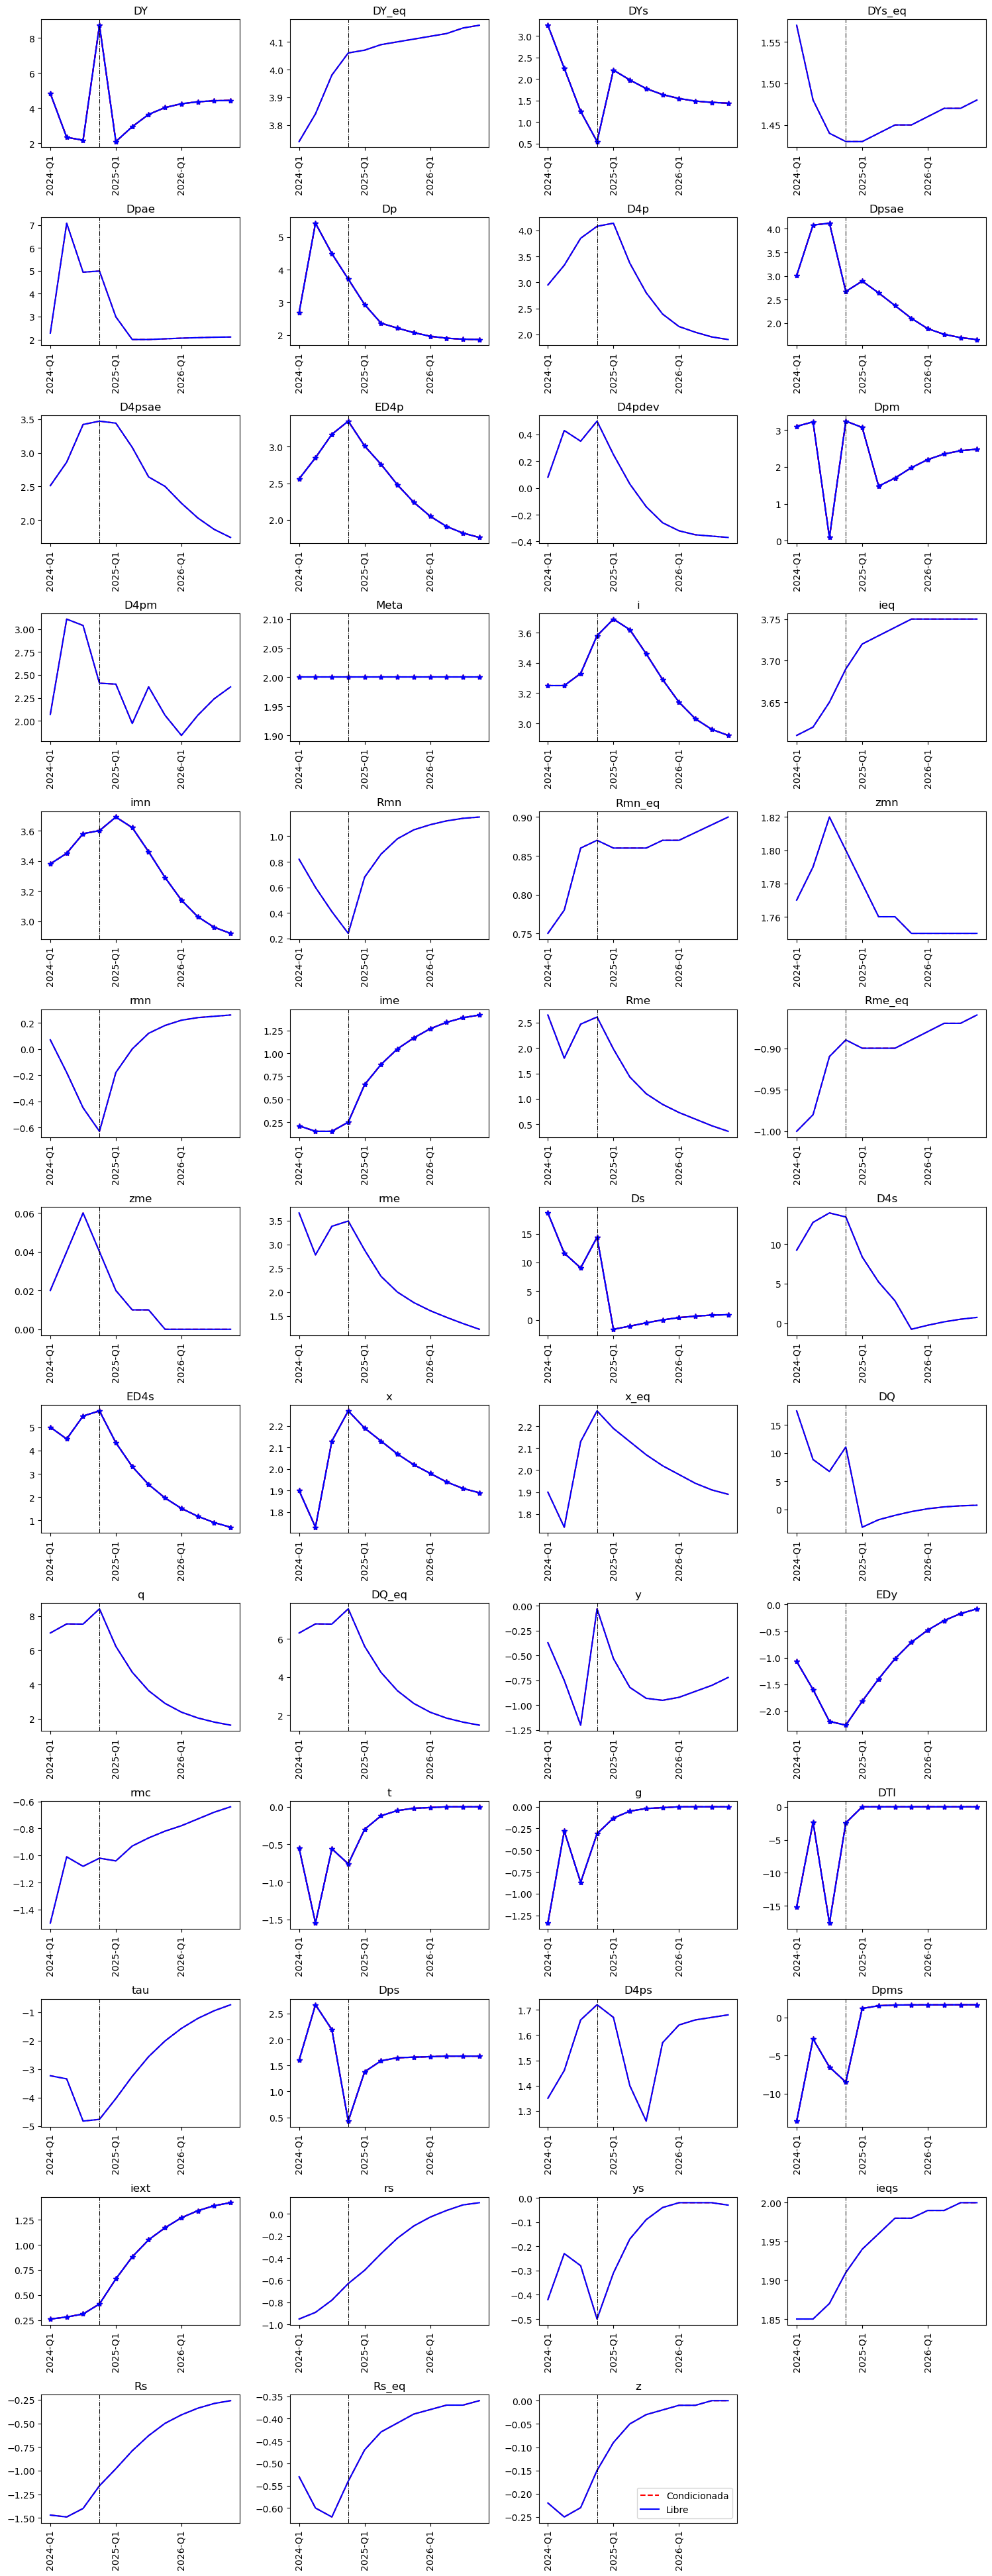

In [25]:
columns = UFDB_report_endog.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))

for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(UFDB_report_endog.index, UFDB_report_endog[col], linestyle='--', label='Condicionada', color = 'red')
    axs[row, col_idx].plot(FDB_report_endog.index, FDB_report_endog[col], linestyle='-', label='Libre', color = 'blue')
    axs[row, col_idx].set_title(col)
    observable = False
    for obs in obsnames:
        if col == obs:
            observable = True
    if observable:
        axs[row, col_idx].plot(UFDB_report_endog.index, UFDB_report_endog[col], linestyle='--', marker='*', label='Cond. Obs.', color = 'red')
        axs[row, col_idx].plot(FDB_report_endog.index, FDB_report_endog[col], linestyle='-', marker='*', label='Libre', color = 'blue')
    axs[row, col_idx].tick_params(axis='x', rotation=90)
    xticks = axs[row, col_idx].get_xticks()
    axs[row, col_idx].set_xticks(xticks[::4])

    if len(xticks) > 3:
        axs[row, col_idx].axvline(x=xticks[3], color='black', linestyle='-.', linewidth=0.75)

    #axs[row, col_idx].xaxis.set_major_locator(mdates.YearLocator())
    #axs[row, col_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.legend()
plt.show()

In [26]:
pdf_file = "UFDB_report.pdf"
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with PdfPages(pdf_file) as pdf:
    # First page for FDB_report_endog
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    table = ax.table(cellText=UFDB_report_endog_pdf.values,
                     colLabels=UFDB_report_endog_pdf.columns,
                     rowLabels=UFDB_report_endog_pdf.index,
                     cellLoc='center',
                     loc='center')

    fig.text(0.01, 0.99, f'Fecha de reporte: {current_datetime}', fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    adjust_column_widths(table, ax)

    fig.tight_layout(pad=3.0)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

    # Second page for FDB_report_exog
    fig_exog, ax_exog = plt.subplots(figsize=(8.5, 11))
    ax_exog.xaxis.set_visible(False)
    ax_exog.yaxis.set_visible(False)
    ax_exog.set_frame_on(False)

    table_exog = ax_exog.table(cellText=UFDB_report_exog_pdf.values,
                               colLabels=UFDB_report_exog_pdf.columns,
                               rowLabels=UFDB_report_exog_pdf.index,
                               cellLoc='center',
                               loc='center')

    fig_exog.text(0.01, 0.99, f'Fecha de reporte: {current_datetime}', fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

    table_exog.auto_set_font_size(False)
    table_exog.set_fontsize(10)
    table_exog.scale(1.2, 1.2)

    adjust_column_widths(table_exog, ax_exog)

    fig_exog.tight_layout(pad=3.0)
    pdf.savefig(fig_exog, bbox_inches='tight')
    plt.close(fig_exog)

print(f"'{pdf_file}' created successfully.")

'UFDB_report.pdf' created successfully.


* Intento de reporteador

Aquí se ve que la confianza ```EDy``` y las condicniones monetarias ```rmc``` explican principalmente la brecha

In [27]:
# Intento de reporteador
#y = ay*y(-1) + aEy*(y(-1) + EDy) + armc*rmc(-1) - at*t + ag*g + aq*q + atau*tau+ ays*ys + m_res_y*res_y

ay = 0.539500000000000
aEy = 0.127700000000000
armc = 0.300000000000000
at = 0.005000000000000
ag = 0.115200000000000
ays = 0.055100000000000
atau = 0.020500000000000
aq = 0.023200000000000
m_res_y = (0.900300000000000)**0.5

hist2show = 4

y     = UFDB['y'].values[-(hist2show+FH):].reshape(-1,1)
yl    = (ay+aEy)*UFDB['y'].values[-((hist2show+FH)+1):-1].reshape(-1,1)
yEDy  = aEy*UFDB['EDy'].values[-(hist2show+FH):].reshape(-1,1)
rmc   = armc*UFDB['rmc'].values[-((hist2show+FH)+1):-1].reshape(-1,1)
t     = -at*UFDB['t'].values[-(hist2show+FH):].reshape(-1,1)
g     = ag*UFDB['g'].values[-(hist2show+FH):].reshape(-1,1)
q     = aq*UFDB['q'].values[-(hist2show+FH):].reshape(-1,1)
tau   = atau*UFDB['tau'].values[-(hist2show+FH):].reshape(-1,1)
ys    = ays*UFDB['ys'].values[-(hist2show+FH):].reshape(-1,1)
res_y = m_res_y*UFDB['res_y'].values[-(hist2show+FH):].reshape(-1,1)
pd.DataFrame(np.c_[y,yl,yEDy,rmc,t,g,q,tau,ys,res_y], columns=['y','(ay+aEy)*y(-1)','aEy*EDy','armc*rmc(-1)','-at*t','ag*g','aq*q','atau*tau','ays*ys','m_res_y*res_y'], index=UFDB.index[-(hist2show+FH):]).T

2024-03-31  2024-06-30  2024-09-30  2024-12-31  2025-03-31  \
y                -0.372058   -0.749937   -1.201698   -0.034537   -0.529608   
(ay+aEy)*y(-1)   -0.430945   -0.248237   -0.500358   -0.801773   -0.023043   
aEy*EDy          -0.136213   -0.204320   -0.280940   -0.289453   -0.232960   
armc*rmc(-1)     -0.339501   -0.451219   -0.301934   -0.324542   -0.305547   
-at*t             0.002764    0.007736    0.002787    0.003799    0.001490   
ag*g             -0.153978   -0.032631   -0.100608   -0.036271   -0.014552   
aq*q              0.162716    0.174880    0.174753    0.195245    0.144515   
atau*tau         -0.066133   -0.068470   -0.098857   -0.097495   -0.082698   
ays*ys           -0.023415   -0.012813   -0.015377   -0.027463   -0.016813   
m_res_y*res_y     0.612646    0.085137   -0.081166    1.343416    0.000000   

                2025-06-30  2025-09-30  2025-12-31  2026-03-31  2026-06-30  \
y                -0.817171   -0.930991   -0.950084   -0.918902   -0.862763   
(ay+aEy)*y(-1)   -0.353355   -0.545217   -0.621157   -0.633896   -0.613092   
aEy*EDy          -0.178794   -0.130555   -0.091177   -0.060673   -0.037885   
armc*rmc(-1)     -0.313098   -0.280103   -0.260638   -0.246277   -0.233348   
-at*t             0.000585    0.000229    0.000090    0.000035    0.000014   
ag*g             -0.005838   -0.002342   -0.000940   -0.000377   -0.000151   
aq*q              0.109392    0.084431    0.067184    0.055494    0.047509   
atau*tau         -0.066610   -0.052571   -0.041143   -0.032085   -0.024983   
ays*ys           -0.009452   -0.004863   -0.002303   -0.001124   -0.000827   
m_res_y*res_y     0.000000    0.000000    0.000000    0.000000    0.000000   

                2026-09-30  2026-12-31  
y                -0.795396   -0.724570  
(ay+aEy)*y(-1)   -0.575635   -0.530688  
aEy*EDy          -0.021331   -0.009694  
armc*rmc(-1)     -0.219798   -0.205310  
-at*t             0.000005    0.000002  
ag*g             -0.000061   -0.000024  
aq*q              0.041912    0.037803  
atau*tau         -0.019441   -0.015124  
ays*ys           -0.001048   -0.001535  
m_res_y*res_y     0.000000    0.000000

In [28]:
UFDB['Dps_uh'] = UCond['Uvar']['var']['Dps']
UFDB[['Dps','Dps_uh']].tail(10)

Dps    Dps_uh
2024-09-30  2.194877       NaN
2024-12-31  0.427300       NaN
2025-03-31  1.384126  1.384126
2025-06-30  1.593054  1.593054
2025-09-30  1.646833  1.646833
2025-12-31  1.664769  1.664769
2026-03-31  1.672243  1.672243
2026-06-30  1.675619  1.675619
2026-09-30  1.677104  1.677104
2026-12-31  1.677766  1.677766

# Simular y guardar observables

1. Simular todas las variables

In [29]:
Thorizon = 80
dateend = '2024Q4'
DBH = DLM.simulateDSGE(Mod,Thorizon,dateend)
DBH.tail(10)

DY_eq    DYs_eq         Ds         y        ys      Dpae  \
2022-09-30  10.671716  1.237427  22.265280  0.430351 -0.149242 -2.785272   
2022-12-31  11.467423  1.256928  16.895843  0.747671  0.310960  6.386395   
2023-03-31  11.467682  1.047173  40.649950  3.686356  0.077276  6.637484   
2023-06-30  11.172792  0.974734  14.753826  3.458412  0.176750  1.413613   
2023-09-30  11.190328  1.177829   0.284393  3.188322 -0.334229 -0.951464   
2023-12-31  10.184066  1.134766  -4.996591  1.918710 -1.128968  4.182264   
2024-03-31  10.126670  1.160302 -11.787625  1.409752 -1.027237  7.919626   
2024-06-30  10.184955  1.061309   0.855975  2.511919 -0.011306 -7.852865   
2024-09-30   9.993037  0.905688 -13.778202  0.228184 -0.622150 -3.461596   
2024-12-31  10.286172  1.115319  10.617072  2.035869 -0.992685 -4.742201   

                  Dp    Dp(-2)    Dp(-1)       D4p  ...    D4s(+1)         x  \
2022-09-30 -1.429973  1.644023 -5.588181 -0.581849  ...   2.683547  0.823231   
2022-12-31  3.870558 -5.588181 -1.429973 -0.375893  ...   9.311235  0.997598   
2023-03-31  2.867023 -1.429973  3.870558 -0.070143  ...  18.505374  1.160875   
2023-06-30  1.860984  3.870558  2.867023  1.792148  ...  16.921448  2.066419   
2023-09-30  1.516487  2.867023  1.860984  2.528763  ...  13.036457  3.421014   
2023-12-31  4.257113  1.860984  1.516487  2.625402  ...   1.583292  3.833596   
2024-03-31  4.837940  1.516487  4.257113  3.118131  ...  -5.120615  4.034443   
2024-06-30 -2.528060  4.257113  4.837940  2.020870  ...  -4.775133  3.997241   
2024-09-30 -0.412276  4.837940 -2.528060  1.538679  ...  -6.540967  3.447080   
2024-12-31 -1.667825 -2.528060 -0.412276  0.057444  ...  -1.550022  2.485003   

                   DQ      DQ_eq      D4ps  D4ps(+3)  D4ps(+2)  D4ps(+1)  \
2022-09-30  24.500844   2.030717  0.066425  1.321155  0.826750  0.204667   
2022-12-31  11.357726   3.907003 -0.562617  0.580460  0.391479 -0.081648   
2023-03-31  36.231009   9.850106 -0.709648  0.526375 -0.250441 -0.385613   
2023-06-30  12.589832  10.365113 -0.679224  0.870932  0.137473 -0.612606   
2023-09-30  -0.375691   8.298206 -0.666521  1.265704  0.826103  0.081745   
2023-12-31 -11.372140   4.685136 -0.779240  0.258084  0.137434 -0.236605   
2024-03-31 -16.249512   0.761243 -0.297248  1.056836  0.180415  0.063932   
2024-06-30   2.056830   0.963811 -0.553297  0.596674  0.329503 -0.539053   
2024-09-30 -11.842450  -1.454849 -0.386529  1.367135  0.706224  0.474405   
2024-12-31  13.042037   1.245999  0.332366  1.191401  1.219048  0.546890   

                  Rs     Rs_eq  
2022-09-30 -0.505986 -0.532748  
2022-12-31 -0.365205 -1.005130  
2023-03-31 -0.476514 -1.136639  
2023-06-30 -0.047214 -1.396694  
2023-09-30  0.027163 -0.877040  
2023-12-31  0.016515 -1.167596  
2024-03-31 -0.585002 -1.712589  
2024-06-30 -0.593221 -1.062782  
2024-09-30 -0.626400 -1.351715  
2024-12-31 -0.742132 -0.760171  

[10 rows x 74 columns]

2. Selecionar sólo las observables

In [30]:
varobsnames = DLM.sympy_to_list(Mod['StateSpaceForm']['obs_names'])
DBobsSim = DBH[varobsnames]
DBobsSim.tail(10)

Dpsae        Dp      Meta       Dpm      ED4p         i  \
2022-09-30 -0.333308 -1.429973  2.000960 -7.799040  0.088519  0.880872   
2022-12-31  1.834821  3.870558  1.999721  3.677771  0.553193  1.825755   
2023-03-31 -0.183916  2.867023  2.000071  4.516409  1.291492  3.053580   
2023-06-30  2.222983  1.860984  2.001340  8.463109  1.979321  4.032473   
2023-09-30  3.513476  1.516487  1.999865 -2.196977  2.255507  5.111026   
2023-12-31  4.317679  4.257113  2.001307  3.950770  2.899070  5.866960   
2024-03-31  2.344334  4.837940  1.998561  3.284806  3.030670  6.191958   
2024-06-30  1.780606 -2.528060  2.001090 -2.740453  2.623049  5.984613   
2024-09-30  2.055138 -0.412276  1.998391 -5.664166  2.087049  5.340260   
2024-12-31  0.819864 -1.667825  2.000126 -4.658976  1.712278  5.112347   

                 imn       ime         Ds         x      ED4s        DTI  \
2022-09-30  0.936143  0.969895  22.265280  0.823231  0.414644  -2.921893   
2022-12-31  1.694070  1.618232  16.895843  0.997598 -0.119660  12.481283   
2023-03-31  3.044046  0.201675  40.649950  1.160875 -3.481492 -28.064172   
2023-06-30  3.955728  1.908323  14.753826  2.066419 -4.792953 -25.506731   
2023-09-30  5.012034  1.257829   0.284393  3.421014 -3.715815   7.364893   
2023-12-31  6.107160  0.764842  -4.996591  3.833596 -3.973580  27.995918   
2024-03-31  6.296252  0.314822 -11.787625  4.034443 -3.133821  10.719386   
2024-06-30  6.008525  1.232136   0.855975  3.997241 -2.299453  23.028835   
2024-09-30  5.323121  1.314730 -13.778202  3.447080 -0.717466  -5.196449   
2024-12-31  4.814488  1.534225  10.617072  2.485003 -0.641886   0.737694   

                   DY       EDy         g         t       Dps       Dpms  \
2022-09-30  22.410986  3.225236 -0.266920  0.971726  0.805591  -8.732632   
2022-12-31  12.736704  2.374754  1.191032  0.527246 -1.667560  -2.143730   
2023-03-31  23.222420  4.205172 -2.023942  1.732954 -1.551918   1.925245   
2023-06-30  10.261017  3.843757 -1.760185 -0.333952 -0.303009 -21.635328   
2023-09-30  10.109969  1.506068  0.926490 -1.766845  0.856402  26.603807   
2023-12-31   5.105619  0.291443  0.468258  0.297048 -2.118436  12.283119   
2024-03-31   8.090836  0.503591 -2.312484  0.290935  0.376052  -1.089877   
2024-06-30  14.593625  1.234121 -1.198244  0.800676 -1.327205  -7.759820   
2024-09-30   0.858096 -1.043715  0.664616  0.624322  1.523475  -1.638656   
2024-12-31  17.516910 -1.643346  0.116043  2.079284  0.757140   9.791892   

                iext       DYs  
2022-09-30  1.004187  2.353732  
2022-12-31  1.026244  3.097738  
2023-03-31  0.802693  0.112435  
2023-06-30  1.247984  1.372632  
2023-09-30  1.446839 -0.866088  
2023-12-31  1.153268 -2.044191  
2024-03-31  0.734373  1.567227  
2024-06-30  0.701388  5.125035  
2024-09-30  0.693640 -1.537688  
2024-12-31  0.620859 -0.366822

3. Guardar en Excel

In [31]:
NombreHoja = "DataSim"
Descripcion = ['Inflación SAE trimestral anualizada','Inflación trimestral anualizada','Meta de inflación','Inflación importada en soles','Expectativas de inflación a 4T','Tasa de política monetaria',\
               'Tasa interbancaria en MN','Tasa interbancaria en ME','Depreciación nominal','Prima de riesgo cambiario','Expectativas de depreciación a 4T','Crec. de los términos de intercambio',\
               'Crec. trimestral del PBI','Confianza empresarial','Impulso de gasto de gobierno','Impulso de recaudación fiscal','Inflación externa','Inflación importada en US$', 'Tasa de interés externa',\
                'Crec. de socios comerciales']
HTS.DB2excel("ObservablesSimulados.xlsx", DBobsSim, sheet=NombreHoja, Description=Descripcion)

# Estudio de IRF

1. Generar todos los IRFs

In [32]:
Horizon=20
IRF = DLM.getIRF(Mod,Horizon)

```IRF``` es un diccionario cuyas "keys" son los choques, dentro de cada "key" se encuentran las respuestas de todas las endogenas ante ese choques. 

El impulso (o choque) esta fijado en 1. Debido a que en el modelo se multiplica a los choques por su desviación estándar, entonces las respuestas son ante choques de 1 desviación estándar.

In [35]:
IRF.keys()

dict_keys(['res_DY_eq', 'res_Dpae', 'res_Dpsae', 'res_ED4p', 'res_Dpm', 'res_Meta', 'res_i', 'res_ieq', 'res_imn', 'res_zmn', 'res_ime', 'res_zme', 'res_Ds', 'res_ED4s', 'res_x', 'res_x_eq', 'res_DQ_eq', 'res_y', 'res_EDy', 'res_t', 'res_g', 'res_DTI', 'res_tau', 'res_DYs_eq', 'res_Dps', 'res_Dpms', 'res_iext', 'res_ys', 'res_ieqs', 'res_z'])

2. Ejemplo para visualizar las respuestas 

Text(0.5, 1.0, 'Respuestas de la TPM')

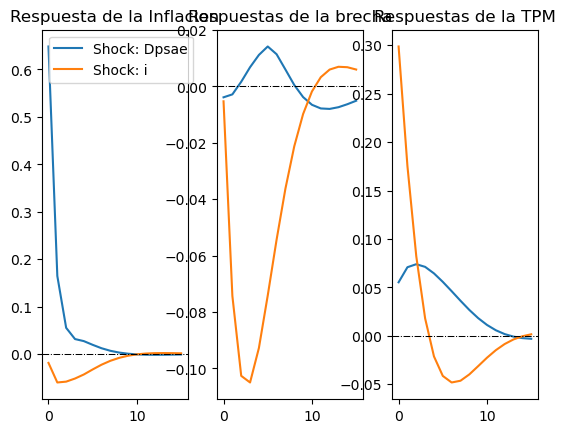

In [36]:
TP = 16   # Horizon to plot (<=Horizon)

shockslist = ['res_Dpsae','res_i']
varslist = ['Dp','y','i']

fig, axs = plt.subplots(1,3)
axs[0].plot(IRF[shockslist[0]].index[:TP], IRF[shockslist[0]][varslist[0]][:TP], linestyle='-',label="Shock: Dpsae")
axs[0].plot(IRF[shockslist[1]].index[:TP], IRF[shockslist[1]][varslist[0]][:TP], linestyle='-',label="Shock: i")
axs[0].axhline(y=0, color='black', linestyle='-.', linewidth=0.75)
axs[0].set_title("Respuesta de la Inflacion")
axs[0].legend(loc="best")

axs[1].plot(IRF[shockslist[0]].index[:TP], IRF[shockslist[0]][varslist[1]][:TP], linestyle='-',label="Shock: Dpsae")
axs[1].plot(IRF[shockslist[1]].index[:TP], IRF[shockslist[1]][varslist[1]][:TP], linestyle='-',label="Shock: i")
axs[1].axhline(y=0, color='black', linestyle='-.', linewidth=0.75)
axs[1].set_title("Respuestas de la brecha")

axs[2].plot(IRF[shockslist[0]].index[:TP], IRF[shockslist[0]][varslist[2]][:TP], linestyle='-',label="Shock: Dpsae")
axs[2].plot(IRF[shockslist[1]].index[:TP], IRF[shockslist[1]][varslist[2]][:TP], linestyle='-',label="Shock: i")
axs[2].axhline(y=0, color='black', linestyle='-.', linewidth=0.75)
axs[2].set_title("Respuestas de la TPM")